In [29]:
import pandas as pd 
import sklearn as sk
import numpy as np
import talib 
from talib import abstract
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
# from xgboost import XGBRegressor, XGBClassifier
# import tuneta
# import pandas_ta as ta
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# import lightgbm as lgb
import os

from sklearn.gaussian_process import GaussianProcessRegressor

In [12]:
src = '../James/'

label = pd.read_csv(src + "10_label.csv")
margin = pd.read_csv(src + "10_feature_past_6_months_margin_short.csv")
ohlcv = pd.read_csv(src + "10_feature_past_6_months_ohlcv.csv")
trans = pd.read_csv(src + "transaction_details.csv")
industry = pd.read_csv(src + "stock_industry.csv")

In [13]:
def calculate_feature(id):
    output = pd.DataFrame()
    for j in range(len(label[label["stock_id"] == id])):
        df = ohlcv[ohlcv["stock_id"] == id].drop(columns=["stock_id","date"]).iloc[j*180:(j+1)*180]
        date = ohlcv[ohlcv["stock_id"] == id][["date","stock_id"]].iloc[j*180:(j+1)*180]
        df = df.astype('float')
        for i in talib.get_functions():
            try:
                # result = eval('abstract.' + {i} + f'ohlcv[ohlcv["stock_id"] == "{2330}"])')
                result = eval('abstract.'+ i + f'(ohlcv[ohlcv["stock_id"] == {id}])')

                result.name = i.lower() if type(result) == pd.core.series.Series else None
                df = pd.merge(df,pd.DataFrame(result),left_on= df.index,right_on=result.index)
                df = df.set_index("key_0")
            except:
                print(i)
        df = pd.merge(date,df,left_index=True,right_index=True) # Specify left_on parameter
        space = pd.merge(df.tail(1),label[label["stock_id"] == id].iloc[j:j + 1],on="stock_id")
        print(j)
        output = pd.concat([output,space])
    return output

In [14]:
result = pd.DataFrame()
for id in ohlcv["stock_id"].unique():
    out = calculate_feature(id)
    result = pd.concat([result,out])

MAVP
0
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
8
MAVP
9
MAVP
10
MAVP
11
MAVP
12
MAVP
13
MAVP
14
MAVP
15
MAVP
16
MAVP
17
MAVP
18
MAVP
19
MAVP
20
MAVP
21
MAVP
22
MAVP
23
MAVP
24
MAVP
25
MAVP
26
MAVP
27
MAVP
28
MAVP
29
MAVP
30
MAVP
31
MAVP
32
MAVP
33
MAVP
0
MAVP
0
MAVP
0
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
0
MAVP
1
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
0
MAVP
1
MAVP
2
MAVP
0
MAVP
1
MAVP
2
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
8
MAVP
9
MAVP
10
MAVP
11
MAVP
12
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
8
MAVP
9
MAVP
10
MAVP
11
MAVP
12
MAVP
13
MAVP
14
MAVP
15
MAVP
0
MAVP
1
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
8
MAVP
9
MAVP
10
MAVP
11
MAVP
12
MAVP
13
MAVP
14
MAVP
15
MAVP
16
MAVP
17
MAVP
18
MAVP
19
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
0
MAVP
1
MAVP
2
MAVP


In [15]:
result['date'] = pd.to_datetime(result['date'])

In [16]:
result.to_csv('./processed.csv')

In [175]:
test = result.copy()
X = test.copy().drop(columns=["Unnamed: 0_x","open","close","high","low", "stock_id","acos","asin","profit(%)","buy_price","buy_date", "sell_date","volume","amount","cosh","exp","sinh","Unnamed: 0_y","sell_price","sell_price","lowest_price","highest_price","MAE","BMFE","GMFE"])
X_train = X[X['date'].dt.year <= 2020].drop(columns=["date"])
X_test = X[X['date'].dt.year >= 2021].drop(columns=["date"])

## Feature distribution overlap

In [178]:
stat_train = X_train.describe()

In [179]:
stat_test = X_test.describe()

In [180]:
stat_train

,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,leadsine,ht_trendmode,add,div,max_x,...,stddev,tsf,var,atr,natr,trange,ad,adosc,obv,mfs_score
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,...,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,7.930000e+02,7.930000e+02,7.930000e+02,793.000000
mean,22.209814,137.072378,0.317223,-0.004548,0.002574,-0.139591,0.814628,89.268726,1.026378,47.508991,...,0.803136,44.670469,1.705554,1.274310,2.874044,1.362913,-2.743726e+08,-1.883658e+06,3.820891e+08,83.385876
std,5.388489,94.555405,2.241713,4.175271,0.604402,0.704704,0.388844,75.129202,0.016467,39.441317,...,1.030469,37.737819,6.932852,1.197736,1.196044,1.613325,8.743007e+08,1.144012e+07,7.079691e+08,2.901132
min,12.445689,-43.748180,-13.566976,-39.506790,-0.999996,-0.999993,0.000000,15.980000,1.003810,8.300000,...,0.020000,8.148681,0.000400,0.145585,0.722460,0.050000,-1.086349e+10,-2.154844e+08,-1.341589e+08,76.000000
25%,18.297920,54.534797,-0.330101,-1.100602,-0.517832,-0.804850,1.000000,46.750000,1.014894,24.750000,...,0.242899,23.415385,0.059000,0.574156,1.990276,0.500000,-1.997680e+08,-2.331329e+06,3.148300e+07,81.000000
50%,21.367286,161.326527,0.121153,0.028543,-0.001893,-0.306497,1.000000,72.500000,1.022260,39.150000,...,0.472652,36.298352,0.223400,0.903105,2.706738,0.850000,-4.068032e+07,-5.022999e+05,1.131293e+08,83.000000
75%,25.372257,201.934371,0.791533,1.027571,0.498490,0.583638,1.000000,106.500000,1.032510,56.500000,...,0.915205,53.327473,0.837600,1.520521,3.495028,1.600000,-1.755952e+06,3.650443e+05,3.790662e+08,85.000000
max,41.505383,314.540976,20.505378,37.646052,0.999994,0.999869,1.000000,698.500000,1.139535,348.500000,...,12.415088,348.582418,154.134400,9.936647,10.045052,14.900000,1.356449e+09,6.994227e+07,4.790990e+09,92.000000


In [189]:
for colname in stat_train.columns:
    
    diff = stat_train[colname]['mean'] - stat_test[colname]['mean']
    mean_std = (stat_train[colname]['std'] + stat_test[colname]['std']) // 2
    
    print(f'{colname}\t{diff/mean_std}')

ht_dcperiod	-0.09049190843394754
ht_dcphase	-0.016235968578937884
inphase	-0.035399511814575346
quadrature	-0.08981757189228906
sine	-inf
leadsine	inf
ht_trendmode	-inf
add	-0.5803691080740261
div	-inf
max_x	-0.5941363484731592
maxindex	-0.5032815376721292
min_x	-0.5728520537946764
minindex	-0.5023864415117686
min_y	-0.5728520537946764
max_y	-0.5941363484731592
minidx	-0.5023864415117686
maxidx	-0.5032815376721292
mult	-0.4027265373981011
sub	-1.0569214967575624
sum	-0.5780877165059802
atan	-inf
ceil	-0.5809051240040134
cos	inf
floor	-0.5823080331277052
ln	-inf
log10	-inf
sin	-inf
sqrt	-0.9801108122895767
tan	0.09726482756129055
tanh	-inf
adx	0.034043754484746364
adxr	0.009988727979137834
apo	-0.08063526857663365
aroondown	0.07659228970704371
aroonup	0.017632851356504935
aroonosc	-0.03508479724550671
bop	inf
cci	-0.022039005091377368
cmo	-0.023794120177971292
dx	-0.017525118215466387
macd_x	-0.12665821771126512
macdsignal_x	-0.10933828331117265
macdhist_x	-inf
macd_y	-0.080635268576633

/tmp/ipykernel_3606/2466404015.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'{colname}\t{diff/mean_std}')
/tmp/ipykernel_3606/2466404015.py:6: RuntimeWarning: invalid value encountered in double_scalars
  print(f'{colname}\t{diff/mean_std}')


We should be very careful for those features with (1) inf, (2) nan or (3) large absolute value, which indicate that the features might not aligh well from training to testing

**Some code for the histogram of candle features (pattern recognition features)**

In [204]:
colname = 'cdlhighwave'
diff = stat_train[colname]['mean'] - stat_test[colname]['mean']
mean_std = (stat_train[colname]['std'] + stat_test[colname]['std']) // 2

In [208]:
from collections import Counter

In [209]:
Counter(X_train['cdlhighwave'])

Counter({0: 718, 100: 57, -100: 18})

In [206]:
stat_train['cdlhighwave']

count    793.000000
mean       4.918033
std       30.376835
min     -100.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000
Name: cdlhighwave, dtype: float64

# Data

In [149]:
test = result.copy()
X = test.copy().drop(columns=["Unnamed: 0_x","open","close","high","low", "stock_id","acos","asin","profit(%)","buy_price","buy_date", "sell_date","volume","amount","cosh","exp","sinh","Unnamed: 0_y","sell_price","sell_price","lowest_price","highest_price","MAE","BMFE","GMFE"])
X_train = np.array(X[X['date'].dt.year <= 2020].drop(columns=["date"]))
X_test = np.array(X[X['date'].dt.year >= 2021].drop(columns=["date"]))
y_train = np.array(test[test['date'].dt.year <= 2020][["profit(%)"]]).reshape(-1)
y_test = np.array(test[test['date'].dt.year >= 2021][["profit(%)"]]).reshape(-1)

## Preprocessing

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [88]:
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel

In [116]:
from sklearn import metrics

In [160]:
def test(y_true, y_pred):
    print(f'r2 \t {metrics.r2_score(y_true, y_pred)}')
    print(f'mae \t {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'rmse \t {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')

In [107]:
X_train.shape

(793, 170)

(array([  5.,   9.,  53., 108., 126.,  61.,  26.,   9.,   7.,   3.]),
 array([-29.27203065, -21.90934372, -14.54665678,  -7.18396984,
          0.17871709,   7.54140403,  14.90409097,  22.2667779 ,
         29.62946484,  36.99215177,  44.35483871]),
 <BarContainer object of 10 artists>)

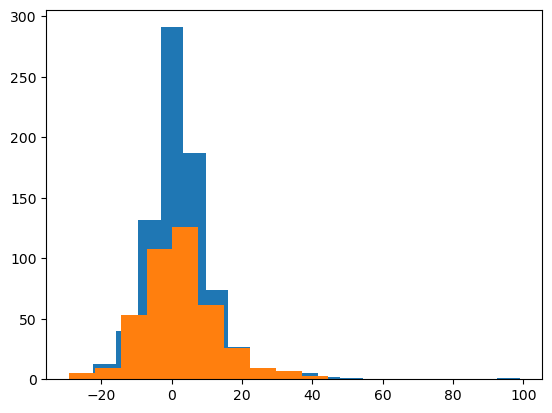

In [145]:
plt.hist(y_train, bins=20)
plt.hist(y_test)

## No prediction, just mean: 

In [169]:
y_pred_naive = y_test.mean(axis=0, keepdims=True)

In [170]:
y_pred_naive

array([2.48223815])

In [171]:
test(y_test, y_pred_naive * np.ones_like(y_test))

r2 	 0.0
mae 	 7.87913273628579
rmse 	 10.725596215735216


## Linear Regression? 

In [155]:
from sklearn.linear_model import LinearRegression

In [164]:
lr = LinearRegression().fit(X_train, y_train)

In [165]:
test(y_test, lr.predict(X_test))

r2 	 -3.0329439863293812
mae 	 10.814469684982154
rmse 	 21.539347266715687


## XGBoost Regressor

In [166]:
from xgboost import XGBRegressor

In [167]:
xgb_regressor = XGBRegressor().fit(X_train, y_train)

In [168]:
test(y_test, xgb_regressor.predict(X_test))

r2 	 -0.17445259548166403
mae 	 8.855317602330732
rmse 	 11.623560733153653


## Gaussian Mixture Model

In [196]:
length_scale_param=1.0
length_scale_bounds_param=(1e-8, 1e8)
nu_param=2.5
matern=Matern(length_scale=length_scale_param,
              length_scale_bounds=length_scale_bounds_param,nu=nu_param)
kernel = matern + WhiteKernel()

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

/home/wbao4/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9)

In [197]:
gaussian_process.predict(X_train, True)

(array([ 2.20595028e+00,  1.55853851e+00,  1.11836726e+00,  9.36581362e-01,
         1.05056509e+00,  2.10467127e+00,  1.69635391e+00,  9.32492248e-01,
         8.08769060e-01,  5.90506537e-01,  3.46904077e-01,  4.08834796e-01,
         6.22022387e-01,  6.81223109e-01,  3.69586974e-01,  8.21502866e-02,
         3.94726158e-02, -5.09757034e-04, -7.53956075e-02, -5.36017773e-02,
         2.20178510e-02,  1.88712003e-01,  1.71775204e-01, -1.04441732e-01,
        -9.35446534e-02,  3.27820599e-02,  1.30126731e-01,  1.09920855e-01,
         1.96125643e-01,  9.18762517e-02,  4.89391542e-01,  2.20247010e+00,
         1.85307731e+00,  1.92946273e+00,  1.92764433e+00,  1.93068937e+00,
         1.99310694e+00,  2.10311576e+00,  2.24050799e+00,  1.61101523e+00,
         1.01419352e+00,  2.00845318e+00,  1.67665446e+00,  1.64396367e+00,
         1.58879022e+00,  1.53567862e+00,  9.59340294e-01,  3.36742243e-01,
         2.07182186e+00,  1.97869748e+00,  1.97745990e+00,  2.07102901e+00,
         2.0

**The prediction is weird on both test and train set.**